# SC1015 Group 7 Project 
## Problem definition: How can we predict a movie's rating solely based on its review?
Using sentiment analysis with a Multilayer Perceptron Neural Network model from sklearn to analyse the language of a movie review to give an positive or negative rating.

## Part 2: Classification Model

### Import essential libraries

In [ ]:
# Install dependencies
!pip install -r ./requirements.txt

In [1]:
# Some standard helper libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Continuing from the last part
#### We need to read the cleaned data from the previous part

*A sklearn function will vectorise the sentence into an array of frequently used words, what we did before is to remove stop words and punctuations, as well as making all letters lowercase, so we will not be using the tokenised reviews from the last part.*

In [2]:
# Read dataset
data = pd.read_csv("./datasets/imdb_master_cleaned.csv")

# Take the data that we want
cleaned_data = data[['cleaned_review', 'label']]  # Take 'cleaned_review' and 'label'
cleaned_data = cleaned_data[cleaned_data['label'] != 'unsup']  # Remove 'unsup' data
cleaned_data['label'] = np.where(cleaned_data['label'] == 'pos', 1, 0)   # Replace pos and neg with 1 and 0

#### Vectorising the data into an array of frequently used words
The output vectors will be of a certain length, where each index represents a certain unigram or bigram, and value represents the frequency of each words.

In [3]:
# We import CountVectorizer to vectorise the sentences 
from sklearn.feature_extraction.text import CountVectorizer

# Transform dataframe column into a list
corpus = cleaned_data['cleaned_review'].tolist()

# Initialise the vectoriser with the following parameters that we think will yields the best result
# min_df: Vectoriser ignore terms that have a frequency lower than the given threshold
# ngram_range: Vectoriser will include unigrams and bigrams in its vocabulary of vectorisation
vectorizer = CountVectorizer(min_df=0.05, ngram_range=(1, 2))  

X = vectorizer.fit_transform(corpus)

# Get the vectorised words length, not gonna print out cause it's too long (564)
gfn = vectorizer.get_feature_names()
print(f"Vectors will be of length {len(gfn)}.")

Vectors will be of length 564.


We can save our vectoriser into a pickle file to be used in the future.

In [5]:
# Save with current time stamp
import pickle

pkl_filename = f"./vectorizers/pickle_vectorizer.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

#### Splitting the dataset into train and test dataset with a 4:1 ratio

In [4]:
from sklearn.model_selection import train_test_split

# Assign X to the features (vectorised reviews) and y to labels (1 or 0) 
# and then we split the data to 80% train and 20% test
X, y = X, cleaned_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=69420)

#### Creating a model and training it
We will be creating a Multi-layer Perceptron (MLP) Classifier

In [5]:
# Train the model with Multi-layer Perceptron (MLP) Classifier
# Can just load if lazy train
from sklearn.neural_network import MLPClassifier

# Initialise classifier with all sorts of parameters, see more on the parameters at 
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# We found the following parameters best suit with dataset we had (except hidden_layer_sizes)
clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(400, ), activation='tanh', solver='adam', verbose=1,
                   validation_fraction=0.2, early_stopping=True)

# Fitting the classifier to our dataset, and getting a score from the test dataset
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

Iteration 1, loss = 0.42091371
Validation score: 0.823875
Iteration 2, loss = 0.36109650
Validation score: 0.829000
Iteration 3, loss = 0.34634054
Validation score: 0.817000
Iteration 4, loss = 0.33176850
Validation score: 0.831250
Iteration 5, loss = 0.31575514
Validation score: 0.834250
Iteration 6, loss = 0.29771180
Validation score: 0.825500
Iteration 7, loss = 0.28210076
Validation score: 0.828750
Iteration 8, loss = 0.26051579
Validation score: 0.829125
Iteration 9, loss = 0.24083258
Validation score: 0.829500
Iteration 10, loss = 0.21506241
Validation score: 0.827625
Iteration 11, loss = 0.19366624
Validation score: 0.829375
Iteration 12, loss = 0.16702670
Validation score: 0.828125
Iteration 13, loss = 0.14394586
Validation score: 0.827250
Iteration 14, loss = 0.12705971
Validation score: 0.823000
Iteration 15, loss = 0.10933975
Validation score: 0.822125
Iteration 16, loss = 0.09058817
Validation score: 0.828375
Validation score did not improve more than tol=0.000100 for 10 co

0.8371

*Optional: We can save a model into a pickle file, to use it later*

In [24]:
# Save with current time stamp
import time
import pickle

timestamp = time.strftime("%y%m%d_%H%M%S")

pkl_filename = f"./pretrained_models/pickle_model_{timestamp}.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

#### Now we can test our freshly baked model on a separate test data (not part of our initial dataset)
We already did some standard data cleanup on the dataset there, e.g. lowercasing the words, stemming, etc.

In [6]:
# Another dataset to test our model on
test_dataset = pd.read_csv("./datasets/IMDB Dataset_cleaned.csv")

Of course we also need to prepare the format of the input data such that it is the same as our model's input

This is what we did:
1. Changing the dataframe columns to lists
2. Vectorise the new reviews using our vectoriser
3. Change the labels to 1 and 0 from positive and negative respectively

In [7]:
test_sen = test_dataset['cleaned_review'].tolist()
test_sen_vectorised = vectorizer.transform(test_sen)
test_sen_label = test_dataset['sentiment'].tolist()
test_sen_label = [1 if i.lower() == 'positive' else 0 for i in test_sen_label]

Now we can actually test our model

In [8]:
# To print random sentences from test dataset for show
import random
test_sen_length = len(test_sen)
actual_sentences = test_dataset['review'].tolist()

# Make predictions given input
predictions = clf.predict(test_sen_vectorised)

print(f"Our model scored a {clf.score(test_sen_vectorised, test_sen_label) * 100:.2f}% accuracy!\n")

print("Here is one of the predictions from our model:\n")

num = random.randint(0, test_sen_length)
print("Our sentence: ")
print(actual_sentences[num])
print()
print(f"Our prediction\t: {'Negative' if predictions[num] == 0 else 'Positive'}")
print(f"Actual label\t: {'Negative' if test_sen_label[num] == 0 else 'Positive'}")

Our model scored a 76.06% accuracy!

Here is one of the predictions from our model:

Our sentence: 
Having seen Carlo Lizzani's documentary on Luchino Visconti, I was bound to higher expectations before watching this film made three years later by Adam Low. But the viewer like me did get dissatisfied... I faced a need for critical opinion, which I generally don't like giving due to the fact there are no documentaries that will satisfy every viewer. There are also no documentaries that will examine a theme totally. But when I read the reviews already written on this title, I also felt a bit confused. People sometimes don't know what to criticize. Therefore, to be clear, I'll divide this film into two major parts that differ considerably: the former one about Visconti before his director's career and latter one about Visconti the director. <br /><br />The aristocratic background, all the hobbies, the wealth that young Luchino experienced and enjoyed are clearly presented. His effort in h

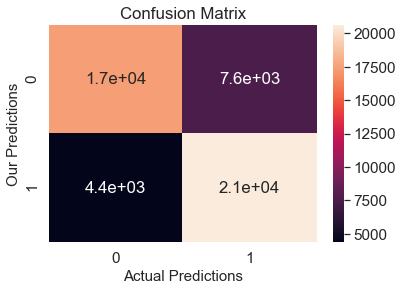

Accuracy		: 76.06%
False Positive Rate	: 0.304
False Negative Rate	: 0.175


In [10]:
# Plot confusion matrix, and calculate accuracy, fpr, and fnr
cm = confusion_matrix(test_sen_label, predictions)
tn, fp, fn, tp = cm.ravel()
acc = (tn + tp) / (tn + tp + fn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

ax = plt.axes()
sb.set(font_scale=1.4)
sb.heatmap(cm, annot=True, ax=ax)

ax.set_title('Confusion Matrix')
plt.xlabel('Actual Predictions', fontsize = 15) 
plt.ylabel('Our Predictions', fontsize = 15) 

plt.show()

print(f"Accuracy\t\t: {acc * 100:.2f}%")
print(f"False Positive Rate\t: {fpr:.3f}")
print(f"False Negative Rate\t: {fnr:.3f}")

#### We can also load a pre-trained model using the pickle library

In [11]:
# To save or load a pre-trained model
import pickle
import random

# Path to our pre-trained model file, end with .pkl
filename = "./pretrained_models/pickle_model_pretrained_1.pkl" 

# To print random sentences from test dataset for show
test_sen_length = len(test_sen)
actual_sentences = test_dataset['review'].tolist()

# Load model and make predictions with pre-trained model
with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
predictions = pickle_model.predict(test_sen_vectorised)

print(f"Our model scored a {pickle_model.score(test_sen_vectorised, test_sen_label) * 100:.2f}% accuracy!\n")

print("Here is one of the predictions from our model:\n")

num = random.randint(0, test_sen_length)
print("Our sentence: ")
print(actual_sentences[num])
print()
print(f"Our prediction\t: {'Negative' if predictions[num] == 0 else 'Positive'}")
print(f"Actual label\t: {'Negative' if test_sen_label[num] == 0 else 'Positive'}")

Our model scored a 76.03% accuracy!

Here is one of the predictions from our model:

Our sentence: 
Hilarious, clean, light-hearted, and quote-worthy. What else can you ask for in a film? This is my all-time, number one favorite movie. Ever since I was a little girl, I've dreamed of owning a blue van with flames and an observation bubble.<br /><br />The cliché characters in ridiculous situations are what make this film such great fun. The wonderful comedic chemistry between Stephen Furst (Harold) and Andy Tennant (Melio) make up most of my favorite parts of the movie. And who didn't love the hopeless awkwardness of Flynch? Don't forget the airport antics of Leon's cronies, dressed up as Hari Krishnas: dancing, chanting and playing the tambourine--unbeatable! The clues are genius, the locations are classic, and the plot is timeless.<br /><br />A word to the wise, if you didn't watch this film when you were little, it probably won't win a place in your heart today. But nevertheless give 

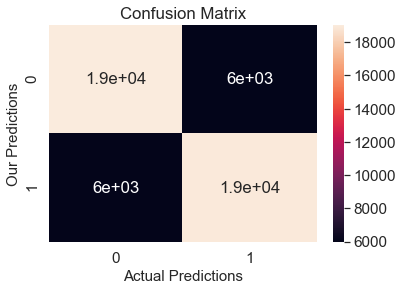

Accuracy		: 76.03%
False Positive Rate	: 0.238
False Negative Rate	: 0.241


In [14]:
# Plot confusion matrix, and calculate accuracy, fpr, and fnr
cm = confusion_matrix(test_sen_label, predictions)
tn, fp, fn, tp = cm.ravel()
acc = (tn + tp) / (tn + tp + fn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

ax = plt.axes()
sb.set(font_scale=1.4)
sb.heatmap(cm, annot=True, ax=ax)

ax.set_title('Confusion Matrix')
plt.xlabel('Actual Predictions', fontsize = 15) 
plt.ylabel('Our Predictions', fontsize = 15) 

plt.show()

print(f"Accuracy\t\t: {acc * 100:.2f}%")
print(f"False Positive Rate\t: {fpr:.3f}")
print(f"False Negative Rate\t: {fnr:.3f}")